# Problem Statement

A  new  pharmaceutical  startup  is  recently  acquired  by  one  of  the  world's  largest  MNCs. For  the  acquisition
process,  the  startup  is  required  to  tabulate  all  drugs  that  they  have  sold  and  account  for  each  drug's
e×ectiveness.  A  dedicated  team  has  been  assigned  the  task  to  analyze  all  the  data.  This  data  has  been
collected  over  the  years  and  it  contains  data  points  such  as  the  drug's  name,  reviews  by  customers,
popularity  and  use  cases  of  the  drug,  and  so  on.  Members of  this  team  are  by  the  noise  present  in  the
data.

Your  task  is  to  make a  sophisticated  NLP-based  Machine Learning  model that  has  the  mentioned features
as  the  input.  Also,  use  the  input  to  predict  the  base  score  of  a  certain  drug  in  a  provided  case.

# Data

The  dataset  has  the  following  columns:

<table>
  <tr>
    <th>Variable  Name</th>
    <th>Description</th>
  </tr>
  <tr>
    <td>patient_id</td>
    <td>ID  of  patients</td>
  </tr>
  <tr>
<td>name_of_drug</td>
<td>Name  of  the  drug  prescribed</td>
  </tr>
  <tr>
<td>use_case_for_drug</td>
<td>Purpose of the drug</td>
  </tr>
  <tr>
<td>review_by_patient</td>
<td>Review  by  patient</td>
  </tr>
  <tr>
<td>drug_approved_by_UIC</td>
<td>Date  of  approval  of  the  drug  by  UIC</td>
  </tr>
  <tr>
<td>number_of_times_prescribed </td>
<td>Number  of  times  the  drug  is  prescribed</td>
  </tr>
  <tr>
<td>exectiveness_rating</td>
<td>Exectiveness  of  drug</td>
  </tr>
  <tr>
<td>base_score</td>
<td>Generated  score  (Target  Variable)</td>
  </tr>
    
</table>

# Evaluation Criteria

## <b> score = 100*max(0, 1-RMSE(actual_values, predicted_values)) <b>

# Step1: Importing the libraries

In [75]:
import numpy as np
import pandas as pd

# Step2: Import Data

In [76]:
# Importing the dataset
train = pd.read_csv("std_drug_effectiveness_train.csv")

In [77]:
train.shape

(32165, 8)

In [78]:
train.head()

,patient_id,name_of_drug,use_case_for_drug,review_by_patient,effectiveness_rating,drug_approved_by_UIC,number_of_times_prescribed,base_score
0,206461,Valsartan,Left Ventricular Dysfunction,"""It has no side effect, I take it in combinati...",9,20-May-12,27,8.022969
1,95260,Guanfacine,ADHD,"""My son is halfway through his fourth week of ...",8,27-Apr-10,192,7.858458
2,92703,Lybrel,Birth Control,"""I used to take another oral contraceptive, wh...",5,14-Dec-09,17,6.341969
3,35696,Buprenorphine / naloxone,Opiate Dependence,"""Suboxone has completely turned my life around...",9,27-Nov-16,37,6.590176
4,155963,Cialis,Benign Prostatic Hyperplasia,"""2nd day on 5mg started to work with rock hard...",2,28-Nov-15,43,6.144782


# Step3: EDA and Data Visualization

In [79]:
train.columns

Index(['patient_id', 'name_of_drug', 'use_case_for_drug', 'review_by_patient',
       'effectiveness_rating', 'drug_approved_by_UIC',
       'number_of_times_prescribed', 'base_score'],
      dtype='object')

In [80]:
train.name_of_drug.value_counts().count()

2220

In [81]:
train.name_of_drug.value_counts()[:20].plot(kind="bar", figsize=(12,5))

In [82]:
train.use_case_for_drug.value_counts().count()

636

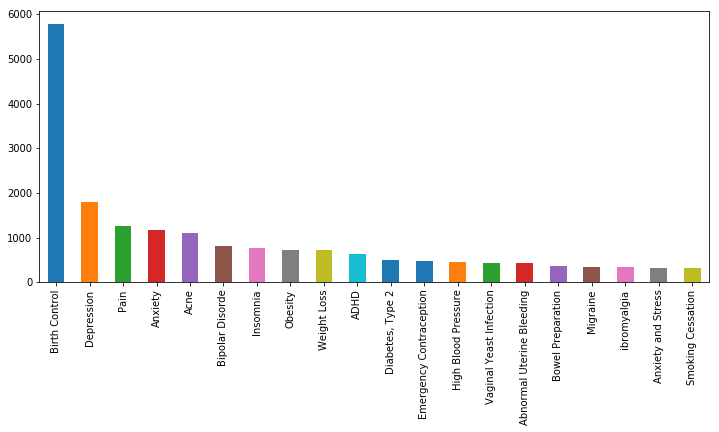

In [83]:
train.use_case_for_drug.value_counts()[:20].plot(kind="bar", figsize=(12,5))

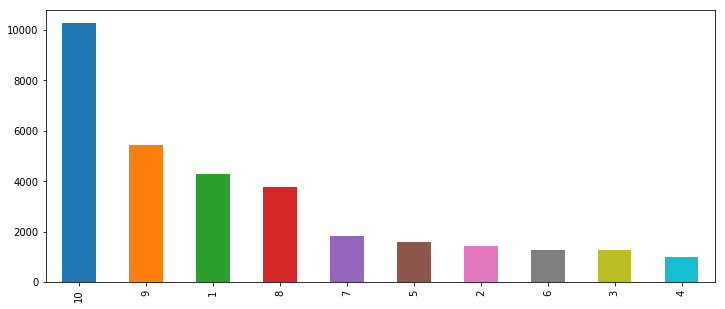

In [84]:
train.effectiveness_rating.value_counts().plot(kind="bar", figsize=(12,5))

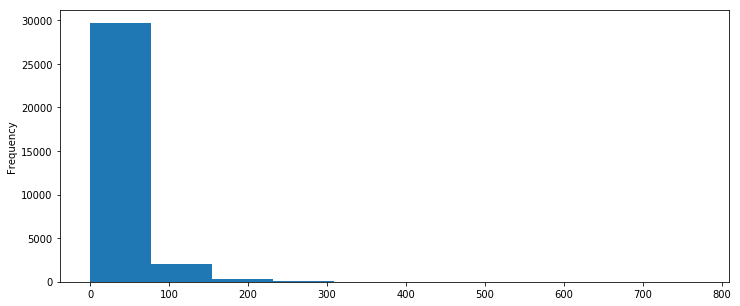

In [85]:
train.number_of_times_prescribed.plot(kind="hist", figsize=(12,5))

# Step4: Preprocessing Text From Dataset

Each review undergoes through a preprocessing step, where all the vague information is removed.

1. Removing the Stopwords, numeric and speacial charecters.
2. Normalizing each review using the approach of stemming.

'''
stopwords: a, an, the, on ..
Special character: @#$%

Stemming: pick only root word

eating -- eat
eaten -- eat
'''

In [87]:
train.shape

(32165, 8)

# Step4.1: Removing stop words, stemming of the words

Using NLTK

In [88]:
train.shape[0]

32165

In [89]:
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer


In [90]:
#IMPORT NLTK AND DOWNLOAD VADER_LEXICON FOR CALCULATING SENTIMENT INTENSITY
import nltk
nltk.download('vader_lexicon')

from nltk.sentiment.vader import SentimentIntensityAnalyzer
sid = SentimentIntensityAnalyzer()

#FUNCTION TO FIND POLARITY SCORE
def polar_score(text):
    score = sid.polarity_scores(text)
    x = score['compound']
    return x


#CREATING A COLUMN NAMED COMPOUND SCORE WITH SENTIMENT INTENSITY AS ITS VALUE 
train['Compound_Score'] = train['review_by_patient'].apply(lambda x : polar_score(x))

#CREATING A COLUMN NAMED LENGTH WITH LENGTH OF REVIEWS AS ITS VALUE
train['length'] = train['review_by_patient'].apply(lambda x: len(x) - x.count(" "))


[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\Bhuwanesh\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [91]:
train.columns

Index(['patient_id', 'name_of_drug', 'use_case_for_drug', 'review_by_patient',
       'effectiveness_rating', 'drug_approved_by_UIC',
       'number_of_times_prescribed', 'base_score', 'Compound_Score', 'length'],
      dtype='object')

# Step5: Creating new Columns from Date

In [92]:
train["drug_approval_day"] = train.drug_approved_by_UIC.str.split("-", n=3, expand=True)[0]
train["drug_approval_month"] = train.drug_approved_by_UIC.str.split("-", n=3, expand=True)[1]
train["drug_approval_year"] = train.drug_approved_by_UIC.str.split("-", n=3, expand=True)[2]

In [93]:
def extract_quarter(date):
    if date in ["Jan", "Feb", "Mar"]:
        return 1
    elif date in ["Apr", "May", "Jun"]:
        return 2
    elif date in ["Jul", "Aug", "Sep"]:
        return 3
    else:
        return 4

In [94]:
train["drug_approval_quarter"] = train["drug_approval_month"].apply(lambda x: extract_quarter(x))

In [95]:
train.columns

Index(['patient_id', 'name_of_drug', 'use_case_for_drug', 'review_by_patient',
       'effectiveness_rating', 'drug_approved_by_UIC',
       'number_of_times_prescribed', 'base_score', 'Compound_Score', 'length',
       'drug_approval_day', 'drug_approval_month', 'drug_approval_year',
       'drug_approval_quarter'],
      dtype='object')

In [96]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [97]:
train["drug_approval_month"] = le.fit_transform(train["drug_approval_month"])

# Create a count vector of the column

In [98]:
train.head()

,patient_id,name_of_drug,use_case_for_drug,review_by_patient,effectiveness_rating,drug_approved_by_UIC,number_of_times_prescribed,base_score,Compound_Score,length,drug_approval_day,drug_approval_month,drug_approval_year,drug_approval_quarter
0,206461,Valsartan,Left Ventricular Dysfunction,"""It has no side effect, I take it in combinati...",9,20-May-12,27,8.022969,-0.2960,63,20,8,12,2
1,95260,Guanfacine,ADHD,"""My son is halfway through his fourth week of ...",8,27-Apr-10,192,7.858458,0.8603,601,27,0,10,2
2,92703,Lybrel,Birth Control,"""I used to take another oral contraceptive, wh...",5,14-Dec-09,17,6.341969,0.7645,623,14,2,09,4
3,35696,Buprenorphine / naloxone,Opiate Dependence,"""Suboxone has completely turned my life around...",9,27-Nov-16,37,6.590176,0.9403,586,27,9,16,4
4,155963,Cialis,Benign Prostatic Hyperplasia,"""2nd day on 5mg started to work with rock hard...",2,28-Nov-15,43,6.144782,-0.4342,334,28,9,15,4


In [99]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_features = 400)
X_temp = cv.fit_transform(train['review_by_patient']).toarray()

In [100]:
train_temp = train[['effectiveness_rating', 'number_of_times_prescribed', 'Compound_Score', 'length',
       'drug_approval_day', 'drug_approval_month', 'drug_approval_year', 'drug_approval_quarter']].values

# Step6: Create X and Y

In [101]:
X = np.concatenate((X_temp, train_temp), axis=1)

In [102]:
y = train['base_score']

# Step7: Splitting the dataset into Test and Train

In [103]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

In [105]:
X_train.shape

(22515, 408)

# Function to calculate Score

In [104]:
def get_score(y_test, y_predict):
    score = 100*max(0, 1-np.sqrt(metrics.mean_squared_error(y_test, y_predict)))
    print("Score is: ", score)

# Step8: Applying Model

In [106]:
from sklearn import metrics
from sklearn.metrics import r2_score

In [107]:
from sklearn.linear_model import LinearRegression

lrmodel=LinearRegression()
lrmodel.fit(X_train,y_train)
y_predict=lrmodel.predict(X_test)

print("Linear Regression R2 Score: ", r2_score(y_test,y_predict))
print("Linear Regression MSE Score: ", metrics.mean_squared_error(y_test, y_predict))
print("Linear Regression RMSE Score: ", np.sqrt(metrics.mean_squared_error(y_test, y_predict)))

get_score(y_test, y_predict)

Linear Regression R2 Score:  0.1722253953284476
Linear Regression MSE Score:  2.098657478424899
Linear Regression RMSE Score:  1.4486743866117393
Score is:  0


In [108]:
from sklearn import linear_model
lassoclf = linear_model.Lasso(alpha=0.1)
lassoclf.fit(X_train,y_train)
y_predict=lassoclf.predict(X_test)

print("Lasso Regression R2 Score: ", r2_score(y_test,y_predict))
print("Lasso Regression MSE Score: ", metrics.mean_squared_error(y_test, y_predict))
print("Lasso Regression RMSE Score: ", np.sqrt(metrics.mean_squared_error(y_test, y_predict)))

get_score(y_test, y_predict)

Lasso Regression R2 Score:  0.1739412360744199
Lasso Regression MSE Score:  2.0943073062971256
Lasso Regression RMSE Score:  1.4471721757611034
Score is:  0


In [109]:
from sklearn.linear_model import Ridge
ridgeclf = linear_model.Ridge(alpha=1.0)
ridgeclf.fit(X_train,y_train)
y_predict=ridgeclf.predict(X_test)

print("Ridge Regression R2 Score: ", r2_score(y_test,y_predict))
print("Ridge Regression MSE Score: ", metrics.mean_squared_error(y_test, y_predict))
print("Ridge Regression RMSE Score: ", np.sqrt(metrics.mean_squared_error(y_test, y_predict)))

get_score(y_test, y_predict)

Ridge Regression R2 Score:  0.1722465182975078
Ridge Regression MSE Score:  2.09860392534809
Ridge Regression RMSE Score:  1.4486559030177215
Score is:  0


In [110]:
from sklearn.svm import SVR
svrclf = SVR(C=1.0, epsilon=0.2)
svrclf.fit(X_train,y_train)

y_predict=svrclf.predict(X_test)

print("SVR R2 Score: ", r2_score(y_test,y_predict))
print("SVR MSE Score: ", metrics.mean_squared_error(y_test, y_predict))
print("SVR RMSE Score: ", np.sqrt(metrics.mean_squared_error(y_test, y_predict)))

get_score(y_test, y_predict)

c:\users\bhuwanesh\appdata\local\programs\python\python36-32\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVR R2 Score:  0.1416315483226409
SVR MSE Score:  2.17622207807579
SVR RMSE Score:  1.4752023854630218
Score is:  0


In [111]:
from sklearn.tree import DecisionTreeRegressor

# Fit regression model
regr_1 = DecisionTreeRegressor(max_depth=2)
regr_2 = DecisionTreeRegressor(max_depth=5)
regr_1.fit(X_train,y_train)
regr_2.fit(X_train,y_train)

# Predict
y_1 = regr_1.predict(X_test)
y_2 = regr_2.predict(X_test)

print("****** y1 ***************** ")
print("DT Regression R2 Score: ", r2_score(y_test,y_1))
print("DT Regression MSE Score: ", metrics.mean_squared_error(y_test, y_1))
print("DT Regression RMSE Score: ", np.sqrt(metrics.mean_squared_error(y_test, y_1)))
get_score(y_test, y_1)

print("****** y2 ***************** ")
print("DT Regression R2 Score: ", r2_score(y_test,y_2))
print("DT Regression MSE Score: ", metrics.mean_squared_error(y_test, y_2))
print("DT Regression RMSE Score: ", np.sqrt(metrics.mean_squared_error(y_test, y_2)))
get_score(y_test, y_2)



****** y1 ***************** 
DT Regression R2 Score:  0.3238455749198331
DT Regression MSE Score:  1.7142547412741942
DT Regression RMSE Score:  1.3092955133483786
Score is:  0
****** y2 ***************** 
DT Regression R2 Score:  0.5167962358375771
DT Regression MSE Score:  1.2250668086935337
DT Regression RMSE Score:  1.1068273617387374
Score is:  0


# Stage2: Apply on Test Data

In [112]:
# Importing the dataset
test = pd.read_csv("std_drug_effectiveness_test.csv")

#CREATING A COLUMN NAMED COMPOUND SCORE WITH SENTIMENT INTENSITY AS ITS VALUE 
test['Compound_Score'] = test['review_by_patient'].apply(lambda x : polar_score(x))

#CREATING A COLUMN NAMED LENGTH WITH LENGTH OF REVIEWS AS ITS VALUE
test['length'] = test['review_by_patient'].apply(lambda x: len(x) - x.count(" "))


test["drug_approval_day"] = test.drug_approved_by_UIC.str.split("-", n=3, expand=True)[0]
test["drug_approval_month"] = test.drug_approved_by_UIC.str.split("-", n=3, expand=True)[1]
test["drug_approval_year"] = test.drug_approved_by_UIC.str.split("-", n=3, expand=True)[2]

test["drug_approval_quarter"] = test["drug_approval_month"].apply(lambda x: extract_quarter(x))

test["drug_approval_month"] = le.fit_transform(test["drug_approval_month"])



In [91]:
#test_data = test[['effectiveness_rating', 'number_of_times_prescribed', 'Compound_Score', 'length',
#       'drug_approval_day', 'drug_approval_month', 'drug_approval_year', 'drug_approval_quarter']]

In [113]:
cv = CountVectorizer(max_features = 400)
X1_temp = cv.fit_transform(test['review_by_patient']).toarray()

test_temp = test[['effectiveness_rating', 'number_of_times_prescribed', 'Compound_Score', 'length',
       'drug_approval_day', 'drug_approval_month', 'drug_approval_year', 'drug_approval_quarter']].values

test_data = np.concatenate((X1_temp, test_temp), axis=1)

In [114]:
test_data.head()

AttributeError: 'numpy.ndarray' object has no attribute 'head'

In [93]:
test["base_score"] = ridgeclf.predict(test_data)

In [94]:
test_data_for_submission = test[["patient_id", "base_score"]]

In [97]:
test_data_for_submission.head()

,patient_id,base_score
0,163740,7.261503
1,39293,7.093512
2,208087,6.059594
3,23295,6.649444
4,97013,5.763051


In [98]:
test_data_for_submission.to_csv("Submission_file_ridge.csv")